# Análise Exploratória Aprofundada - Risco de Crédito

**Objetivo:** Realizar uma análise exploratória detalhada no conjunto de dados `application_test.csv` para entender as principais características dos solicitantes, a qualidade dos dados e as relações entre as variáveis.

## 1. Configuração Inicial

In [13]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações de visualização
sns.set(style="whitegrid")
pd.options.display.max_columns = None # Mostrar todas as colunas

# Criar pastas para salvar os gráficos
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

print('Ambiente configurado com sucesso!')

Ambiente configurado com sucesso!


## 2. Carregamento e Inspeção dos Dados

In [14]:
try:
    df_test = pd.read_csv('data/application_test.csv')
    print(f"Dataset 'application_test.csv' carregado. Dimensões: {df_test.shape}")
except FileNotFoundError:
    print("ERRO: O arquivo 'application_test.csv' não foi encontrado na pasta 'data'.")

# Visualizar as primeiras linhas
df_test.head()

Dataset 'application_test.csv' carregado. Dimensões: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

## 3. Análise de Dados Faltantes (Missing Values)

Um dos passos mais importantes é entender a quantidade de dados faltantes em nosso dataset. Vamos calcular a porcentagem de valores nulos para cada coluna e visualizar as 30 colunas com mais dados faltantes.

Colunas com dados faltantes:


,Total,Porcentagem
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


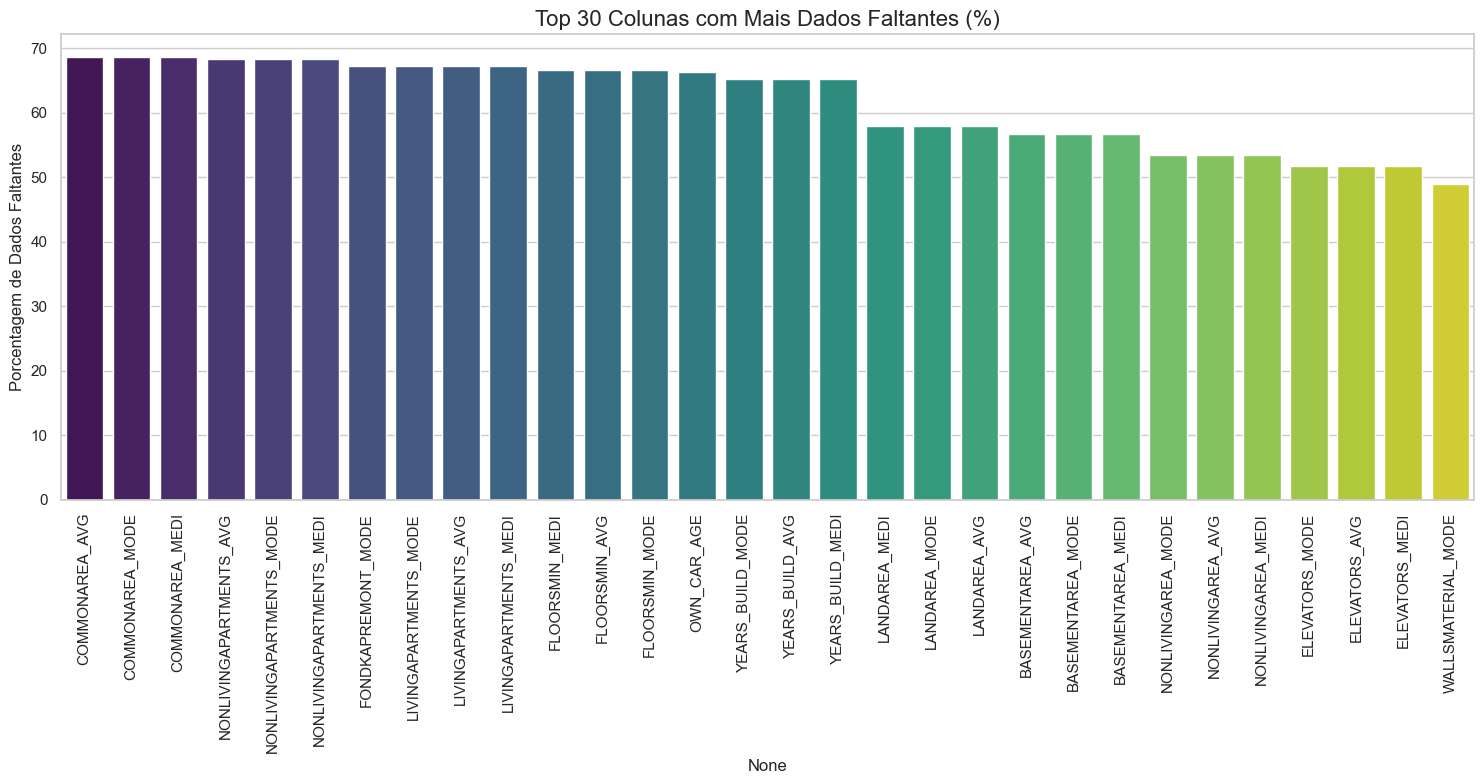

In [15]:
missing_values = df_test.isnull().sum()
missing_percent = (missing_values / len(df_test)) * 100
missing_table = pd.concat([missing_values, missing_percent], axis=1, keys=['Total', 'Porcentagem'])
missing_table = missing_table[missing_table['Total'] > 0].sort_values(by='Porcentagem', ascending=False)

print("Colunas com dados faltantes:")
display(missing_table.head(30))

# Visualização gráfica
plt.figure(figsize=(15, 8))
sns.barplot(
    x=missing_table.head(30).index,
    y=missing_table.head(30)['Porcentagem'],
    hue=missing_table.head(30).index,
    palette='viridis',
    legend=False
)
plt.xticks(rotation=90)
plt.title('Top 30 Colunas com Mais Dados Faltantes (%)', fontsize=16)
plt.ylabel('Porcentagem de Dados Faltantes', fontsize=12)
plt.tight_layout()
plt.savefig('visualizations/dados_faltantes.png')
plt.show()

**Insight:** Muitas colunas têm mais de 50% de dados faltantes. Isso indica que precisaremos de uma estratégia robusta para lidar com eles, como remover a coluna ou usar técnicas de imputação, antes de treinar um modelo.

## 4. Análise Univariada - Perfil dos Solicitantes

### 4.1. Variáveis Categóricas

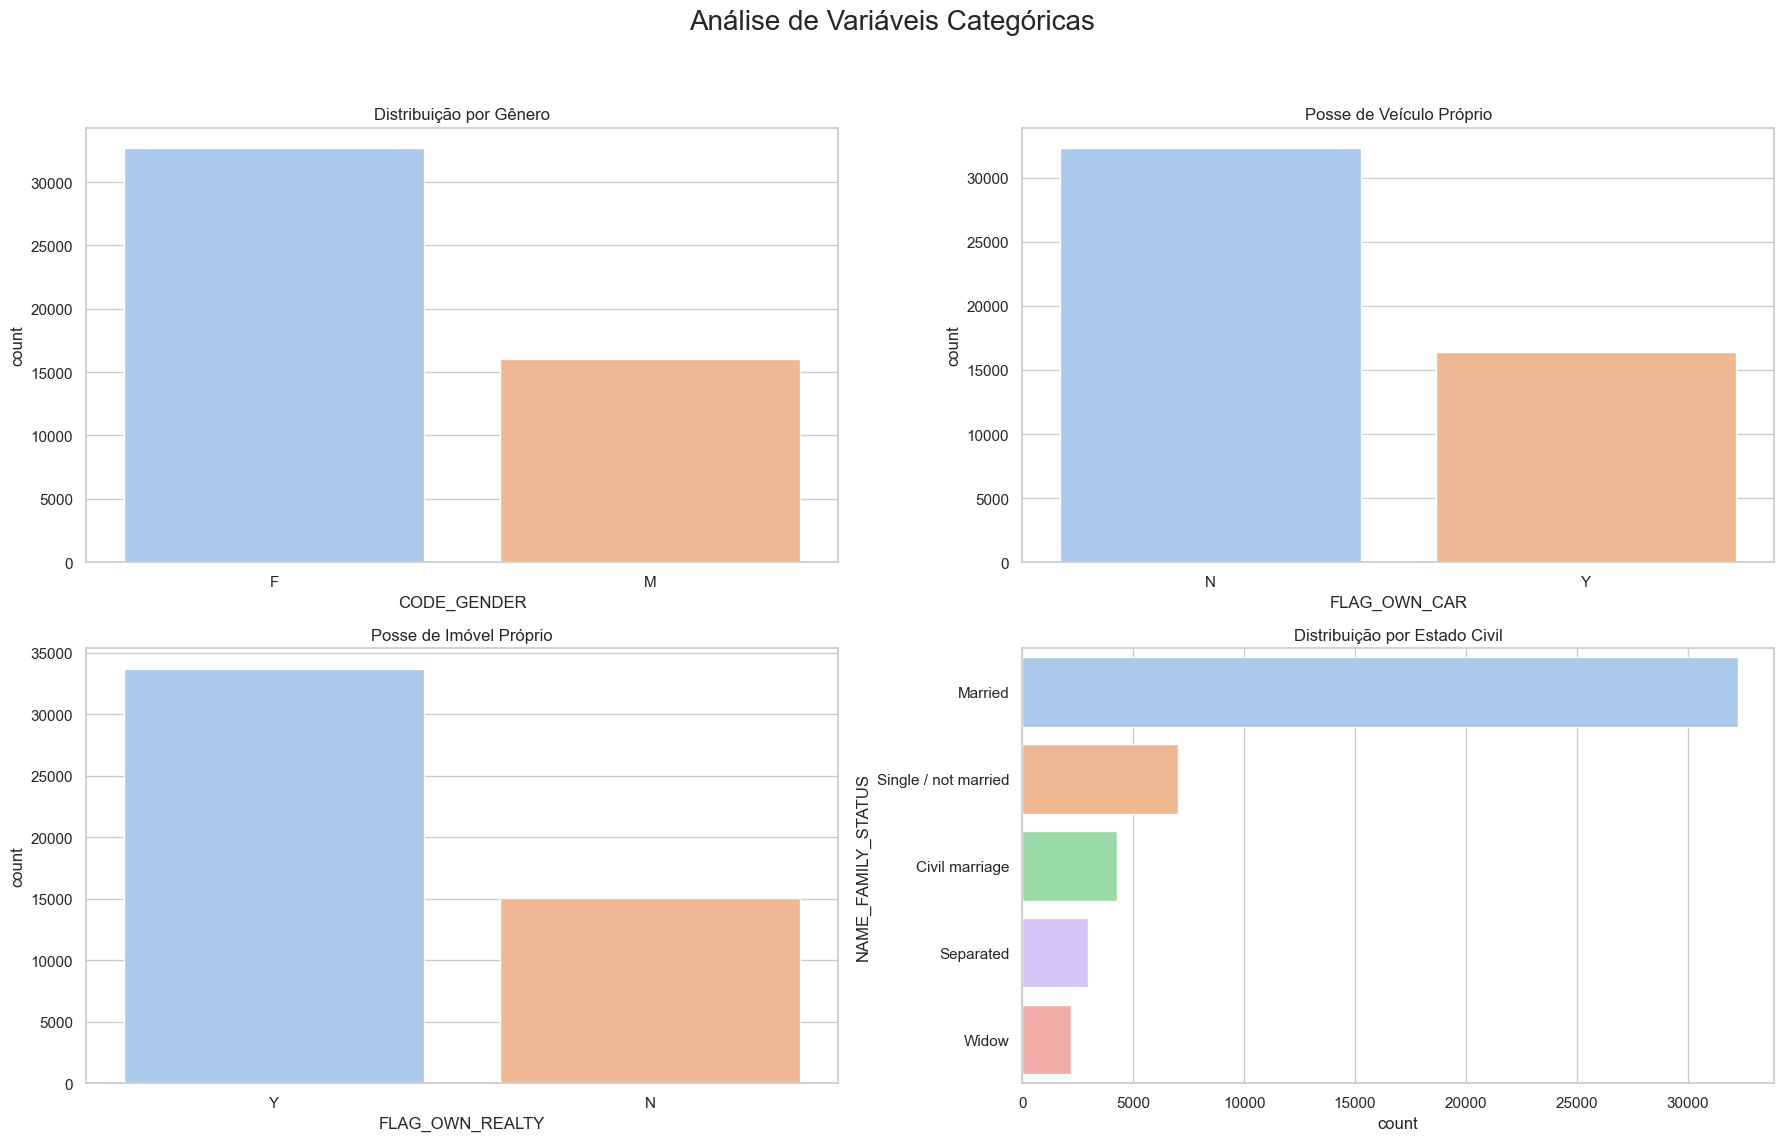

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Análise de Variáveis Categóricas', fontsize=20)

# Gênero
sns.countplot(ax=axes[0, 0], x='CODE_GENDER', hue='CODE_GENDER', data=df_test, palette='pastel', legend=False)
axes[0, 0].set_title('Distribuição por Gênero')

# Posse de Veículo Próprio
sns.countplot(ax=axes[0, 1], x='FLAG_OWN_CAR', hue='FLAG_OWN_CAR', data=df_test, palette='pastel', legend=False)
axes[0, 1].set_title('Posse de Veículo Próprio')

# Posse de Imóvel
sns.countplot(ax=axes[1, 0], x='FLAG_OWN_REALTY', hue='FLAG_OWN_REALTY', data=df_test, palette='pastel', legend=False)
axes[1, 0].set_title('Posse de Imóvel Próprio')

# Estado Civil
sns.countplot(ax=axes[1, 1], y='NAME_FAMILY_STATUS', hue='NAME_FAMILY_STATUS', data=df_test, order=df_test['NAME_FAMILY_STATUS'].value_counts().index, palette='pastel', legend=False)
axes[1, 1].set_title('Distribuição por Estado Civil')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('visualizations/variaveis_categoricas.png')
plt.show()

**Insights:**
- A maioria dos solicitantes é do sexo feminino.
- A maioria não possui carro, mas possui um imóvel.
- A categoria de estado civil mais comum é "Casado(a)".

### 4.2. Variáveis Numéricas

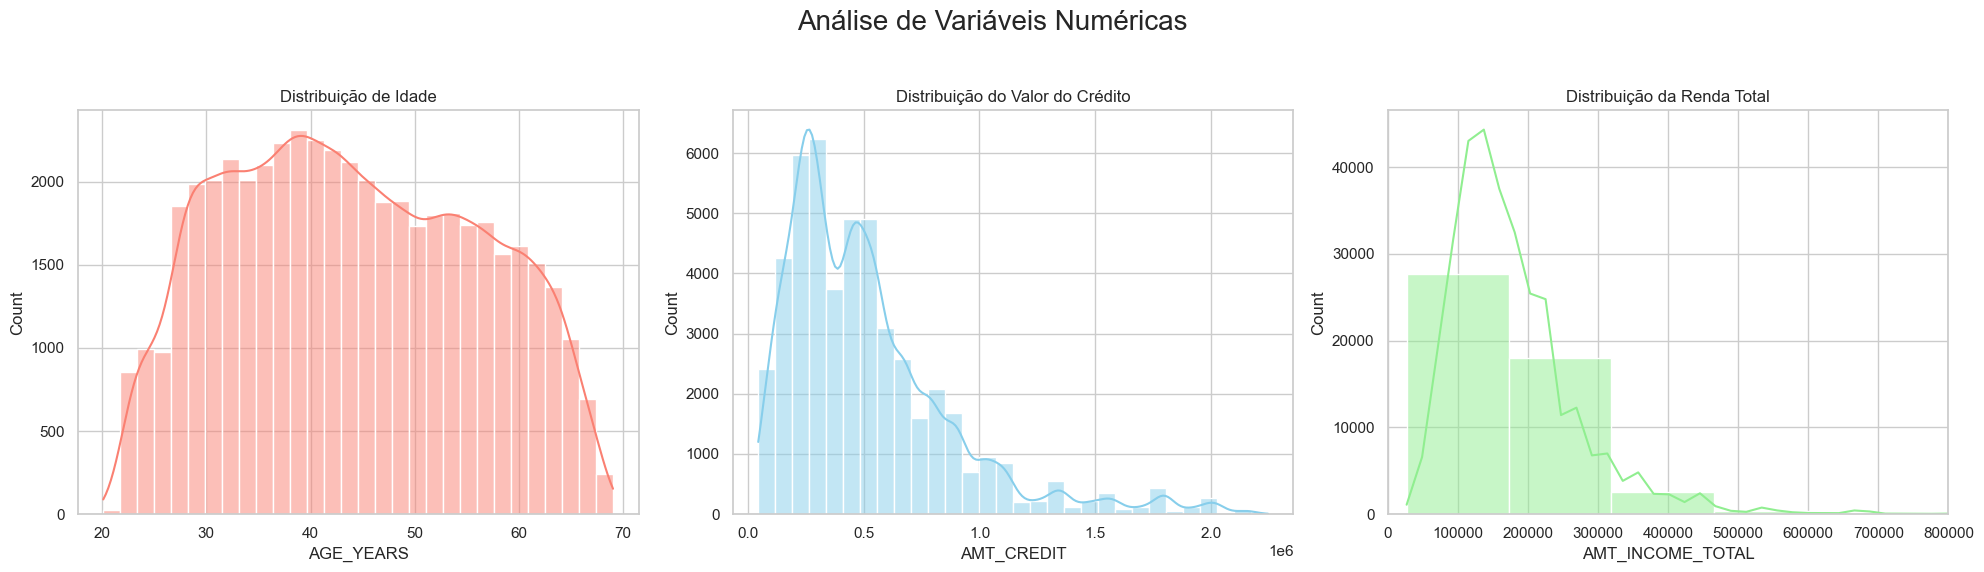

In [17]:
# Converter 'DAYS_BIRTH' para idade em anos
df_test['AGE_YEARS'] = -df_test['DAYS_BIRTH'] / 365

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Análise de Variáveis Numéricas', fontsize=20)

# Distribuição de Idade
sns.histplot(ax=axes[0], data=df_test, x='AGE_YEARS', bins=30, kde=True, color='salmon')
axes[0].set_title('Distribuição de Idade')

# Distribuição do Valor do Crédito
sns.histplot(ax=axes[1], data=df_test, x='AMT_CREDIT', bins=30, kde=True, color='skyblue')
axes[1].set_title('Distribuição do Valor do Crédito')

# Distribuição da Renda Total
sns.histplot(ax=axes[2], data=df_test, x='AMT_INCOME_TOTAL', bins=30, kde=True, color='lightgreen')
axes[2].set_xlim(0, 800000) # Limitar para melhor visualização
axes[2].set_title('Distribuição da Renda Total')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('visualizations/variaveis_numericas.png')
plt.show()

**Insights:**
- A distribuição de idade é bem espalhada, com um pico entre 30 e 45 anos.
- Tanto o valor do crédito quanto a renda total são assimétricos à direita, indicando que a maioria dos valores se concentra em faixas mais baixas, com alguns valores muito altos (outliers).

## 5. Análise de Correlação

Vamos investigar a relação linear entre as principais variáveis numéricas usando um mapa de calor de correlação.

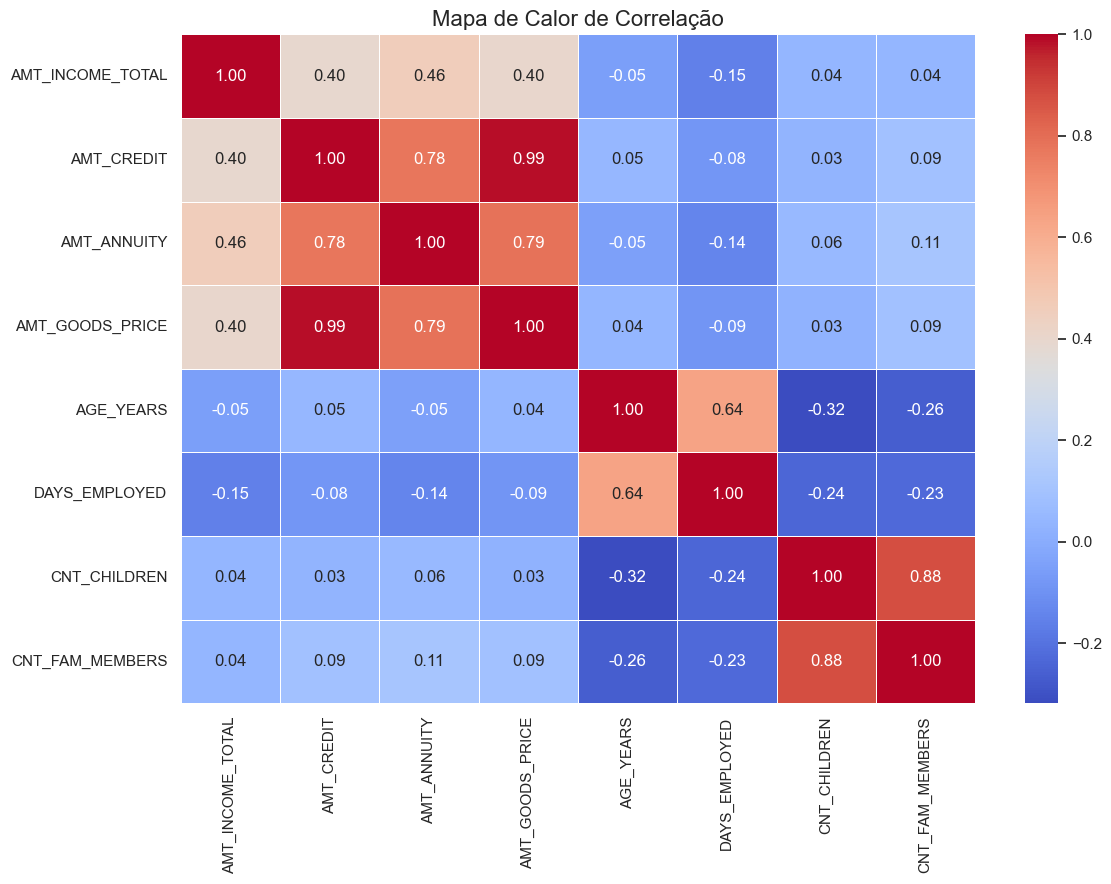

In [18]:
# Selecionar colunas numéricas de interesse
cols_corr = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'AGE_YEARS', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS'
]

corr_matrix = df_test[cols_corr].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlação', fontsize=16)
plt.tight_layout()
plt.savefig('visualizations/mapa_correlacao.png')
plt.show()

**Insights:**
- **Forte Correlação Positiva:** `AMT_CREDIT` (Valor do Crédito) e `AMT_GOODS_PRICE` (Preço do Bem) têm uma correlação muito forte (0.98), o que é esperado, já que o crédito é geralmente para comprar um bem específico. `AMT_ANNUITY` (Anuidade) também é fortemente correlacionada com `AMT_CREDIT`.
- **Correlação Moderada:** `CNT_CHILDREN` (Número de Filhos) e `CNT_FAM_MEMBERS` (Membros da Família) são, como esperado, correlacionados.
- **Correlação Fraca:** A Renda (`AMT_INCOME_TOTAL`) tem uma correlação positiva, mas fraca, com o valor do crédito e a anuidade. A idade (`AGE_YEARS`) não parece ter uma forte correlação linear com as variáveis financeiras.

## 6. Conclusões Finais e Próximos Passos

Esta análise exploratória aprofundada nos forneceu uma visão clara do perfil dos solicitantes e da estrutura dos dados. Identificamos a grande quantidade de dados faltantes como o principal desafio para a próxima fase.

**Próximos Passos:**
1. **Obter `application_train.csv`**: Essencial para treinar um modelo preditivo, pois contém a variável `TARGET`.
2. **Limpeza e Pré-processamento**: Aplicar técnicas de imputação para dados faltantes e codificar variáveis categóricas.
3. **Engenharia de Features**: Criar novas variáveis que possam capturar melhor as informações (ex: `CREDIT_INCOME_RATIO`).
4. **Modelagem**: Treinar e avaliar diferentes modelos de classificação para prever o risco de crédito.